In [123]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

print(tf.__version__)

2.3.1


In [124]:
##############################
########## SECTION 1 #########
#### LOADING THE DATASET ####
############################

In [125]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [126]:
print("X_train shape: {}   X_test shape {}".format(X_train.shape, X_test.shape))
print("Y_train shape: {}   Y_test shape {}".format(y_train.shape, y_test.shape))

X_train shape: (60000, 28, 28)   X_test shape (10000, 28, 28)
Y_train shape: (60000,)   Y_test shape (10000,)


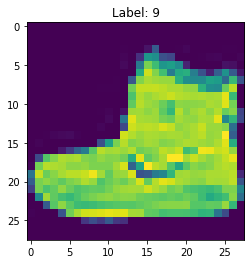

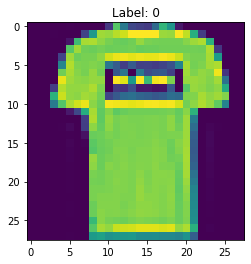

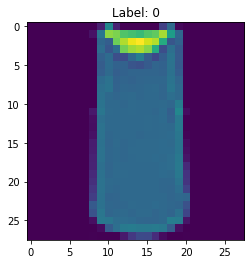

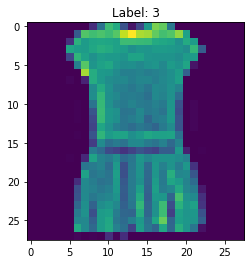

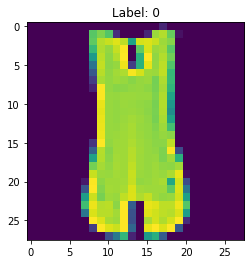

<Figure size 432x288 with 0 Axes>

In [127]:
# Looking at images in training set
N = 5
plt.subplot()
for i in range(0, N):
    plt.imshow(X_train[i])
    plt.title("Label: {}".format(y_train[i]))
    plt.figure()
plt.show()

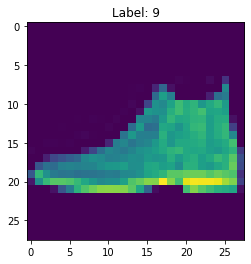

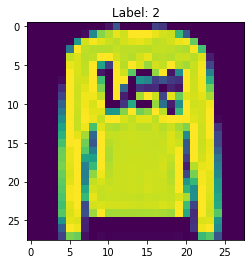

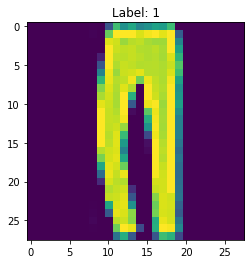

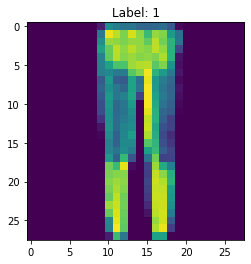

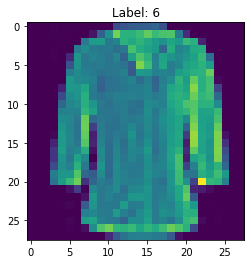

<Figure size 432x288 with 0 Axes>

In [128]:
# Looking at images in test set
N = 5
plt.subplot()
for i in range(0, N):
    plt.imshow(X_test[i])
    plt.title("Label: {}".format(y_test[i]))
    plt.figure()
plt.show()

In [129]:
# Normalize our data so that pixels are between 1 and 0
X_train = X_train/255
X_test = X_test/255

In [130]:
# Defining Model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [131]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

In [132]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [133]:
r = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5876 - accuracy: 0.7891 - val_loss: 0.4222 - val_accuracy: 0.8457
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4297 - accuracy: 0.8450 - val_loss: 0.3775 - val_accuracy: 0.8605
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3927 - accuracy: 0.8557 - val_loss: 0.3686 - val_accuracy: 0.8666
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3722 - accuracy: 0.8638 - val_loss: 0.3661 - val_accuracy: 0.8673
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3542 - accuracy: 0.8715 - val_loss: 0.3495 - val_accuracy: 0.8746
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3363 - accuracy: 0.8759 - val_loss: 0.3345 - val_accuracy: 0.8783
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3287 - accuracy: 0.8784 - val_loss: 0.3326 - val_accuracy:

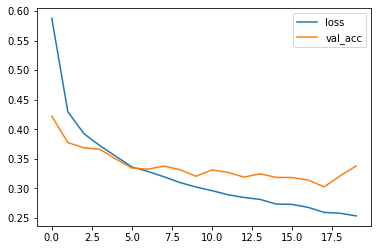

In [134]:
# Plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_acc')
plt.legend()

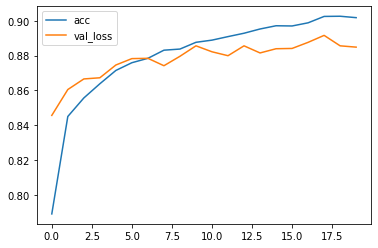

In [135]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_loss')
plt.legend()

In [136]:
# Making Prediction
pred = model.predict(X_test)

In [137]:
# Evaluate the model
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.3589 - accuracy: 0.8786
[0.35887300968170166, 0.878600001335144]


In [158]:
pred = np.argmax(pred, axis=1)

In [247]:
# misclassified will store the index at which misclassification happens
misclassified = []
for i in range(0, len(pred)):
    if(pred[i] != y_test[i]):
        misclassified.append(i)

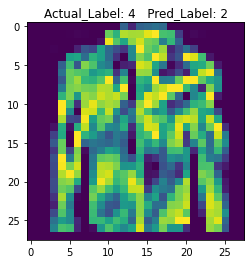

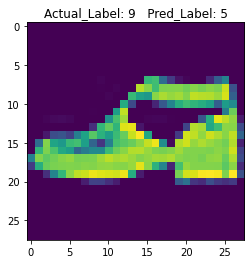

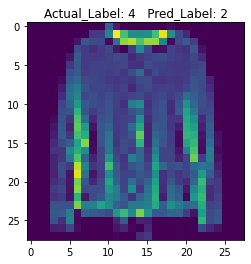

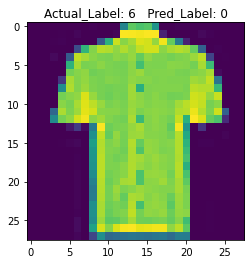

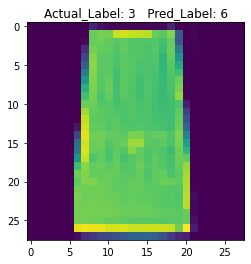

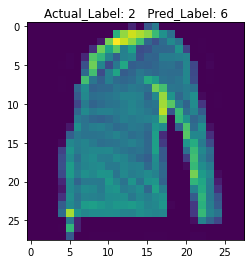

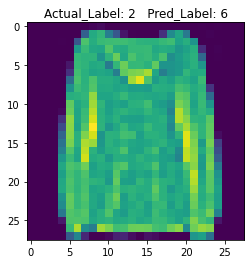

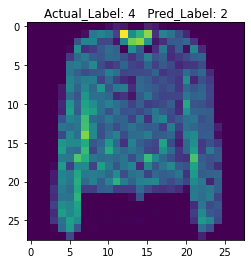

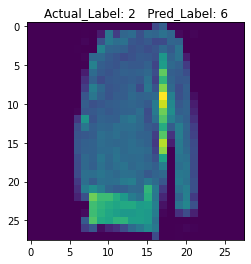

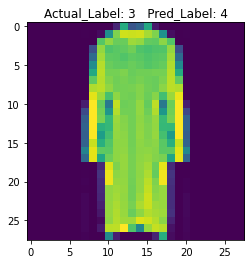

<Figure size 432x288 with 0 Axes>

In [252]:
# Looking at 10 misclassifed images
N = 10
plt.subplot()
for i in range(0, N):
    plt.imshow(X_test[misclassified[i]])
    plt.title("Actual_Label: {}   Pred_Label: {}".format(y_test[misclassified[i]], pred[misclassified[i]]))
    plt.figure()
plt.show()